<a href="https://colab.research.google.com/github/mwithgod3952/Solab_Class/blob/main/class_code3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 3><font color = 'grey'> 환경설정</font>

In [ ]:
from google.colab import drive; drive.mount('/content/drive', force_remount=True)

print('\n\n\033[1m\033[94m---\033[0m\n');
# /content/drive/MyDrive/class_folder/Project_Class
new_path = input('- 작업경로를 입력해주세요: '); print('\n')
import os
os.chdir(new_path)

from tqdm import tqdm
for step_i in tqdm(range(2)):
    if step_i == 0:
        print('\n\t\033[1mThe working path has been successfully changed\033[0m')  
    elif step_i == 1:
        if os.getcwd() == new_path:
            print(f'\t\033[1mMounted at{new_path}\033[0m\n')  
        else:
            print(f'\t\033[1mfailed mount\033[0m\n')  

Mounted at /content/drive


---

- 작업경로를 입력해주세요: /content/drive/MyDrive/class_folder/Project_Class




100%|██████████| 2/2 [00:00<00:00, 5479.17it/s]


	The working path has been successfully changed
	Mounted at/content/drive/MyDrive/class_folder/Project_Class



---

<font size = 3><font color = 'grey'> 학습목표</font>

    1. 데이터프레임 구조이해와 생성 (데이터의 구조변환) 
    2. 딕셔너리와 리스트, 리스트와 시리즈

<font size = 2>**Homework**: 아래의 pandas 공식페이지에 들어가 "10 minutes to pandas" 코드를 카피코딩 해봅시다.</font>

<font size = 2>pandas library는 데이터 추출, 처리, 분석 분야에 있어 필수적입니다. 아래의 링크를 통해 확인할 수 있는 문서의 코드를 카피 코딩하며 데이터라는 것이 어떤 형식과 방식으로 사용되는지를 학습해 봅시다.</font>

> <font size = 2>**[A link](https://pandas.pydata.org/docs/user_guide/10min.html)**</font>

---

In [ ]:
import os
import copy
import random
import numpy as np
import pandas as pd

from google.colab import data_table

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# 공유파일 URL: https://drive.google.com/file/d/1wu8Zoowp96csMfEuCNRkA3LQGWLyS0Un/view?usp=sharing
URL = input('공유받고자 하는 파일의 링크를 입력해주세요.: ')

!pip install -U -q PyDrive
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
filename = input('저장하고자 하는 파일의 이름을 입력해 주세요. (확장자명 제외): ')
shared_drv_id = URL[URL.find('/d/'):].split('/')[2]
drive.CreateFile({'id':shared_drv_id}).GetContentFile(f'{os.getcwd()}/{filename}.csv') 

i = 0
for fi in os.listdir():
    if i == 0:
        if filename in fi:
            print('\n')
            print('*'*1); print('\t\033[1mNew data has been created\033[0m');
            i += 1 
if i > 0:
    df = pd.read_csv(f'{filename}.csv').iloc[:, 1:]
    print('*'*2); print('\t\033[1mThe file is stored in variable \033[91mdf\033[0m');

공유받고자 하는 파일의 링크를 입력해주세요.: https://drive.google.com/file/d/1wu8Zoowp96csMfEuCNRkA3LQGWLyS0Un/view?usp=sharing
저장하고자 하는 파일의 이름을 입력해 주세요. (확장자명 제외): class_w02


*
	New data has been created
**
	The file is stored in variable df


In [ ]:
data_table.DataTable(df, include_index=True, num_rows_per_page=10)

,키워드,출처,카테고리,검색량,상품량,경쟁률,쇼핑전환
0,헬스장,상품,피트니스/PT,307600.0,473360.0,1.53,0.76
1,헬스,상품,웨이트용품,61210.0,9333156.0,152.47,0.62
2,벨트,상품,정장벨트,36360.0,9646001.0,265.29,0.10
3,디자인,상품,디자인문패,24420.0,21640053.0,886.16,0.27
4,학과,상품,기타교구,19400.0,16837.0,0.86,0.00
5,마네킹,인기,마네킹,13800.0,270619.0,19.61,3.72
6,디스플레이,상품,모니터,12570.0,5074783.0,403.72,0.06
7,여성,상품,중목/장목양말,9430.0,255894816.0,27136.24,0.08
8,가정용런닝머신,상품,접이식,9200.0,55649.0,6.04,2.47
9,러닝머신,상품,접이식,9040.0,198830.0,21.99,1.58


    우리는 공유받은 csv 파일을 url 형태로 공유받아 이를 'df'라는 변수에 'Pandas' Library의 'DataFrame'이라는 데이터 타입으로 저장하였어요.

<font size = 2><font color = 'grey'>*** 우리가 비록 DataFrame을 처음 접했을지라도 구조를 천천히 살펴보아요. 기존에 공부했던 데이터 자료형들과는 어떤 차이가 있는지 또, DataFrame만이 가지고 있는 특징은 어떤 것들이 있을지 함께 토론해봐요 :)**</font>

# <font size = 4>**1. 데이터프레임 구조이해와 생성**</font>

## <font color = 'red'>***Q***</font><font size = 3>**: 데이터프레임의 각 열과 행은 무엇으로 구분할 수 있나요?**</font>

---

### <font size=3><font color = 'grey'>**1. 먼저 데이터프레임의 '열'은 '열의 이름'으로 구분지을 수 있어요.**</font>

<iframe src="https://cdn.britannica.com/72/232772-050-4E3D86CC/mind-blown-emoji-head-exploding-emoticon.jpg" width="600" height="300"></iframe>

> <font size=2><font color = 'blue'>**먼저 데이터의 모든 열의 이름을 불러보죠. .columns라는 함수를 변수 df에 바로 적용하여 열의 이름을 불러와보겠습니다.**</font>

> <font size=2><font color = 'blue'>**.columns 함수를 통해 불러온 전체 열의 정보와, 각, 열의 데이터 타입은 어떤 형태로 저장되어 있는지도 알아보죠 ![An image](https://cdn.dribbble.com/users/1179659/screenshots/4128574/media/4c17d841e4437eaab777b1df30f8779d.gif)**</font>

In [ ]:
colname = df.columns
print('DataType: {:}\n'.format(type(colname)))
colname

DataType: <class 'pandas.core.indexes.base.Index'>



Index(['키워드', '출처', '카테고리', '검색량', '상품량', '경쟁률', '쇼핑전환'], dtype='object')

In [ ]:
i = 0
for ci in colname:
    print('\t {:} | \033[1m{:<5}\033[0m{:>5}'.format(type(ci), f'col{i}', ci))
    i += 1
print('\n')

	 <class 'str'> | col0   키워드
	 <class 'str'> | col1    출처
	 <class 'str'> | col2  카테고리
	 <class 'str'> | col3   검색량
	 <class 'str'> | col4   상품량
	 <class 'str'> | col5   경쟁률
	 <class 'str'> | col6  쇼핑전환




<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2>**class str 형태의 각 열 이름이 class .Index 형태로 함께 저장되어 있는 것 을 확인할 수 있어요.**</font>

<font color = 'crimeson'><font size = 2>**더불어, 이것을 꼭 기억해 두세요. 프로그래밍에서 인덱스는 데이터의 색인과 같은 역할을 해요. 인덱스를 생성하면 데이터 검색을 빠르게 할 수 있는 경우가 있어요.**</font> 

<font color = 'grey'><font size = 2>즉, .columns 함수를 사용하여 추출할 수 있는 열의 이름들은 이름과 함께 순서가 정다는 것이 특징입니다. [ex]'키워드' 열은 0번째, '출처' 열은 1번째에 위치해 있습니다.</font>
    

> <font size=2><font color = 'blue'>**먼저 데이터의 모든 열의 이름을 변경해보죠. .rename 이라는 함수를 사용하여 기존 열의 이름을 우리가 원하는 새로운 이름으로 바꿔보겠습니다.**</font>

In [ ]:
new_col_name = {
    colname[0]: 'keyword',
    colname[1]: 'source',
    colname[2]: 'category',
    colname[3]: 'search volume',
    colname[4]: 'quantity',
    colname[5]: 'competition_rate',
    colname[6]: 'purchase_conversion'}

df = df.rename( columns = new_col_name )

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2>**Python Dictionary에 Key 값에는 기존의 열 이름을, Value 값에는 바꾸고자 하는 열의 이름을 지정하여 저장한 뒤, .rename 함수를 사용하여 열의 이름을 변경할 수 있어요.**</font>


---

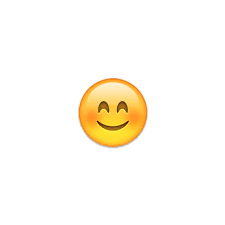
<font color = 'crimson'><font size = 2>* Dictionary의 특징에는 어떤 것들이 있었나요?.</font>

    - Dictionary를 사용하여 Key : Value를 함께 지정하여 저장할 수 있어요(Pair).
    - Dictionary는 순서를 지정하여 저장해요. 그래서, Key값을 딱 지정하여 데이터를 추출할 수도 있지만 저장된 Key의 순서를 활용할 수도 있답니다.

In [ ]:
if  new_col_name[list(new_col_name.keys())[0]] == new_col_name[colname[0]]:
    print(f'\n\t {new_col_name[list(new_col_name.keys())[0]]}')


	 keyword


---

> <font size=2><font color = 'blue'>**이번에는 지정된 열 데이터의 색인(Index)를 활용하여 열 이름을 바꿔볼까요?**</font>

    1) .shape함수를 통해 데이터프레임의 열의 크기와 행의 크기를 확인해봅시다.

In [ ]:
data_shape = df.shape

print(f'\n\t- 행의 수: {data_shape[0]}')
print(f'\t- 열의 수: {data_shape[1]}')


	- 행의 수: 37
	- 열의 수: 7


    2) 열의 크기 7만큼을 반복하여 Index를 추출 및 활용하여 열의 이름을 변경해보겠습니다.

In [ ]:
new_columns = ['keyword', 'source', 'category', 'search volume', 'quantity', 'competition_rate', 'purchase_conversion']
df = pd.read_csv(f'{filename}.csv').iloc[:, 1:]

for i in range(data_shape[1]):
    df.columns.values[i] = new_columns[i]

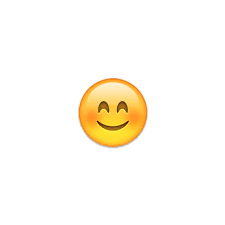
<font color = 'crimson'><font size = 2>* 위에서 확인했던 것과 같이, .columns 함수를 통한 출력된 결과는 class .Index 형태입니다. 아직까지는 print를 통해 확인할 수 있는 일반적인 결과값 뿐 아니라 Index로서의 기능이 포함된 상태임을 유의해야해요.</font>

<font size = 2>**이런 이유로,** 열 데이터의 정보를 바꾸어주기 위해서는, .value 함수를 추가적으로 연결하여 우리가 원하는 데이터 만을 추출 후 변경해주어야하죠 :)</font>

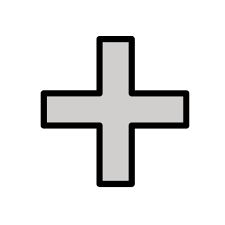
<font color = 'grey'><font size = 2>.columns.vlues의 DataType은 array에요 :)</font>

In [ ]:
df.columns.values

array(['keyword', 'source', 'category', 'search volume', 'quantity',
       'competition_rate', 'purchase_conversion'], dtype=object)

In [ ]:
type(df.columns.values)

numpy.ndarray

<img src="https://t3.ftcdn.net/jpg/04/55/55/86/360_F_455558670_uAQfvqw8cT8erAExftZUlNV5H37fqJL5.jpg" width="40"/> 
<font color = 'grey'><font size = 2>**"Array"**는 **"배열"**이에요.</font> 

<font color = 'grey'><font size = 2>배열 형태의 데이터는 특히 공학, Ai 분야에서 데이터를 활용할 때에 굉장히 중요하게 다루어지는 형태에요.</font>

<font color = 'grey'><font size = 2>***(구체적인 학습은 수업의 마지막에 진행할께요 !)***</font>

> <font size=2><font color = 'blue'>**먼저 데이터프레임의 열 이름이 우리가 지정했던 대로 잘 변경되었는지 확인해 보아요 :)**</font>

In [ ]:
data_table.DataTable(df, include_index=True, num_rows_per_page=10)

,keyword,source,category,search volume,quantity,competition_rate,purchase_conversion
0,헬스장,상품,피트니스/PT,307600.0,473360.0,1.53,0.76
1,헬스,상품,웨이트용품,61210.0,9333156.0,152.47,0.62
2,벨트,상품,정장벨트,36360.0,9646001.0,265.29,0.10
3,디자인,상품,디자인문패,24420.0,21640053.0,886.16,0.27
4,학과,상품,기타교구,19400.0,16837.0,0.86,0.00
5,마네킹,인기,마네킹,13800.0,270619.0,19.61,3.72
6,디스플레이,상품,모니터,12570.0,5074783.0,403.72,0.06
7,여성,상품,중목/장목양말,9430.0,255894816.0,27136.24,0.08
8,가정용런닝머신,상품,접이식,9200.0,55649.0,6.04,2.47
9,러닝머신,상품,접이식,9040.0,198830.0,21.99,1.58


<font color = 'white'><font size = 10>.</font>

<img src="https://cdn-0.emojis.wiki/emoji-pics/facebook/man-teacher-facebook.png" width=100/><font size = 2>**정리해봅시다.**</font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2>**Dictionary를 통해 데이터프레임의 Column명을 변경할 수 있어요.**</font>

> <font color = 'grey'><font size = 2>(더불어, Dictionary는 Key값의 **순서**를 지정하여 Value 저장한다는 것도 배웠어요.)</font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2>**Index를 활용하여 Column명을 변경할 수도 있어요.**</font>

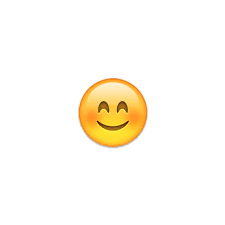
<font color = 'crimson'><font size = 2>* 여기서 주의!    Column data 그 자체가 Index 값을 함께 가지고 있기 때문에, .value 함수를 함께 붙여야만 데이터를 지정하고 변경할 수 있었어요.</font>

<img src="https://t3.ftcdn.net/jpg/04/55/55/86/360_F_455558670_uAQfvqw8cT8erAExftZUlNV5H37fqJL5.jpg" width="40"/> 
<font color = 'red'><font size = 2>**이제 감이 오시나요! Column명 변경을 위해, Dictionary를 활용할 수 있었던 이유, .column함수 활용 시 .value를 함께 고려해야만 했던 것 모두, 눈에 보이진 않지만 Column명과 함께 저장되어 있는 데이터의 '색인(Index)'를 활용하기 때문에 가능했던 거에요 :)**</font>


---

> <font size=2><font color = 'blue'>**우선 변경한 내용도 있으니 데이터프레임을 새롭게 .csv 파일로 저장해보죠**</font>

In [ ]:
new_fnm = f'{filename}_2.csv'
df.to_csv(new_fnm)

> <font size=2><font color = 'blue'>**파일이 정상적으로 저장되었는지 확인해보아요**</font>

In [ ]:
new_fnm in os.listdir(os.getcwd())

True

<font color = 'white'><font size = 30>***------***</font>

### <font size=3><font color = 'grey'>**2. 데이터프레임의 '행'은 오직 '행의 색인'으로 구분지을 수 있어요.**</font>

<font color = 'white'><font size = 2>.</font>

> <font size=2><font color = 'blue'>**우선 보기에 편하도록 데이터 중 상단 5개 행(row)만을 출력시켜보아요. .head() 함수를 사용해여 출력하면 기본적으로 5개의 행이 출력되어요.**</font>

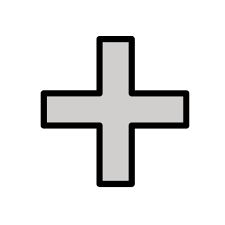
<font color = 'grey'><font size = 2>더 많거나 더 적게 행을 출력하고 싶다면, 괄호 안에 원하는 만큼의 숫자를 입력하면 되요.</font>

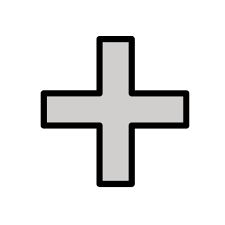<font color = 'grey'><font size = 2> 아래부터 행을 추출하고 싶을 때는 .tail 함수를 사용하기도 하죠 :)</font>

In [ ]:
df.head()

,keyword,source,category,search volume,quantity,competition_rate,purchase_conversion
0,헬스장,상품,피트니스/PT,307600.0,473360.0,1.53,0.76
1,헬스,상품,웨이트용품,61210.0,9333156.0,152.47,0.62
2,벨트,상품,정장벨트,36360.0,9646001.0,265.29,0.10
3,디자인,상품,디자인문패,24420.0,21640053.0,886.16,0.27
4,학과,상품,기타교구,19400.0,16837.0,0.86,0.00


<font color = 'white'><font size = 2>.</font>

<img src="https://img.freepik.com/premium-vector/cute-funny-think-emoji-smile-face-with-question-mark-vector-flat-line-doodle-cartoon-kawaii-character-illustration-icon-isolated-white-background-yellow-emoji-circle-think-character-concept_92289-3170.jpg" width='50'/><img src="https://gifimage.net/wp-content/uploads/2018/10/3-min-gif-4.gif" width='100'/><font size = 3> **데이터를 보면서 잠깐 함께 토론해봐요**</font>
<font size = 2><u>행(Row)만이 가지고 있는 큰 차이점은 무엇일까요?</u></font>

<font color = 'white'><font size = 2>.</font>

---



<font size =5>1.</font>
<font size=2><font color = 'blue'> **먼저 .head()함수를 사용해 첫 번째와 두 번째 행을 추출해볼꺼에요.**</font> 

In [ ]:
df.head(1)

,keyword,source,category,search volume,quantity,competition_rate,purchase_conversion
0,헬스장,상품,피트니스/PT,307600.0,473360.0,1.53,0.76


<font size =5>2.</font>
<font size=2><font color = 'blue'> **이번엔, values 함수를 사용하여 데이터 하나하나를 출력 해 볼께요.**</font>

In [ ]:
df.head(1).values[0]

array(['헬스장', '상품', '피트니스/PT', 307600.0, 473360.0, 1.53, 0.76],
      dtype=object)

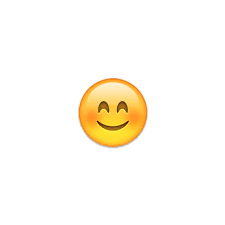
<font color = 'crimson'><font size = 2>* 여기서 주의!    .values 뒤에 [0]를 붙여주었어요. 즉. index를 지정해주었죠. 왜 일까요?</font>

<font color = 'white'><font size = 2>.</font>

</font><img src="https://us.123rf.com/450wm/dragontiger8/dragontiger81907/dragontiger8190700062/127897173-%EB%AC%B8%EC%A0%9C%EC%97%90-%EB%8C%80%ED%95%B4-%EC%9D%B4%EC%95%BC%EA%B8%B0%ED%95%98%EB%8A%94-%EB%91%90-%EC%82%AC%EB%9E%8C-%EC%86%90%EC%9C%BC%EB%A1%9C-%EA%B7%B8%EB%A6%B0.jpg?ver=6" width="130"/><font color = 'grey'><font size=4><b><i>HINT</i></b>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2> 기억하나요! 자료형 '리스트'를 공부할 때, <u>리스트 안에 <b>리스트를 하나의 데이터로서  저장할 수 있다고 하였어요.</b></u></font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2> 위의 코드셀에서 인덱싱 [0]의 결과 값이 어떠했죠? <u>첫 번째 데이터인 '헬스장이 출력될꺼란 예상과는 달리 첫 번째 행의 전체 데이터가 추출되었어요</u></font>

<font color = 'crimeson'><font size = 2>위와 같은 사실들로서 우리가 추리해 볼 수 있는 것은, <b>행(Row)의 데이터</b>는 하나 하나 개별단위로 존재하기 이전에 <b>하나의 덩어리 형태로 저장</b>된다는 점이에요.</font> 



---

<font size = 4><font color = 'crimson'>***Q.***</font><font color = 'grey'><font size = 3> **<i>그럼, 행 데이터에서 덩어리 속 각 하나하나의 데이터들은 무엇을 통해 구분되어지고 저장되어졌을까 ?</i>**</font>

<img src="https://t3.ftcdn.net/jpg/04/55/55/86/360_F_455558670_uAQfvqw8cT8erAExftZUlNV5H37fqJL5.jpg" width="40"/><font size = 3><font color = 'crimeson'><b> 중요해요 !</b></font>

> <font size = 4><font color = 'crimson'>***A.***</font><font size = 2> **열(Column) 정보를 Key 값으로 활용하여 구분되어져 저장되어있어요.**</font>


---

> <font size=2><font color = 'blue'>**.keys()함수를 활용하여 정보를 추출했을 때, 행에 대해 어떤 정보를 추출해주는지 확인해 볼까요?**</font>


In [ ]:
df.head(1).keys()

Index(['keyword', 'source', 'category', 'search volume', 'quantity',
       'competition_rate', 'purchase_conversion'],
      dtype='object')

<img src="https://i.pinimg.com/originals/8a/dd/cd/8addcd0dad97ceac659e066944a771fa.gif" width="150"/>

<font color = 'whithe'><font size = 3>.</font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2> 행을 이루는 데이터들의 순서에 맞추어 열의 이름들을 <b><font color = 'crimeson'><font size = 3>덩어리</font></b> 형태로 반환해주고 있어요.</font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2> 더불어, 모든 행은 동일한 열 이름을 공유하죠.</font> 

> <font size = 2><b><u>우리가 많은 행들을 추출하더라도</u> 특별히 열 정보를 제한하거나 선택하지 않는 이상 <u>모든 경우에 동일한 열의 이름들이 덩어리 형태로 반환될꺼에요.</u></b></font>

In [ ]:
df.keys() == df.head(1).keys()

array([ True,  True,  True,  True,  True,  True,  True])

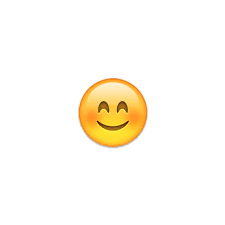
<font color = 'crimson'><font size = 2>* 위와 같은 형태는 dictionary에서도 동일하게 확인할 수 있어요.</font>

In [ ]:
dic = {}
i = 0
for ki in df.keys():
    dic[ki] = df.head(1).values[0][i]
    i += 1    

dic    

{'keyword': '헬스장',
 'source': '상품',
 'category': '피트니스/PT',
 'search volume': 307600.0,
 'quantity': 473360.0,
 'competition_rate': 1.53,
 'purchase_conversion': 0.76}

In [ ]:
dic.keys()

dict_keys(['keyword', 'source', 'category', 'search volume', 'quantity', 'competition_rate', 'purchase_conversion'])

In [ ]:
dic.values()

dict_values(['헬스장', '상품', '피트니스/PT', 307600.0, 473360.0, 1.53, 0.76])

---

<img src="https://cdn-0.emojis.wiki/emoji-pics/facebook/man-teacher-facebook.png" width=100/><font size = 2>**정리해봅시다.**</font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2>**Dictionary를 통해 데이터프레임의 Column명을 변경할 수 있어요.**</font>

> <font color = 'grey'><font size = 2>(더불어, Dictionary는 Key값의 **순서**를 지정하여 Value 저장한다는 것도 배웠어요.)</font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2>**Index를 활용하여 Column명을 변경할 수도 있어요.**</font>

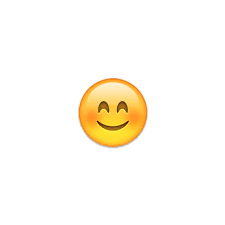
<font color = 'crimson'><font size = 2>* 여기서 주의!    Column data 그 자체가 Index 값을 함께 가지고 있기 때문에, .value 함수를 함께 붙여야만 데이터를 지정하고 변경할 수 있었어요.</font>

<img src="https://t3.ftcdn.net/jpg/04/55/55/86/360_F_455558670_uAQfvqw8cT8erAExftZUlNV5H37fqJL5.jpg" width="40"/> 
<font color = 'red'><font size = 2>**이제 감이 오시나요! Column명 변경을 위해, Dictionary를 활용할 수 있었던 이유, .column함수 활용 시 .value를 함께 고려해야만 했던 것 모두, 눈에 보이진 않지만 Column명과 함께 저장되어 있는 데이터의 '색인(Index)'를 활용하기 때문에 가능했던 거에요 :)**</font>


In [ ]:
URL = 'https://drive.google.com/file/d/1-gytVFIRawF0aCqBzlaPJ1pScAZMNbmH/view?usp=sharing'
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
shared_drv_id = URL[URL.find('/d/'):].split('/')[2]
drive.CreateFile({'id':shared_drv_id}).GetContentFile(f'{os.getcwd()}/{filename}.txt') 

import pickle
with open(f'{filename}.txt', 'rb') as f:
    T = pickle.load(f)

In [ ]:
print(T[1])
print(T[2])
print(T[7])

{'keyword': '헬스', 'source': '상품', 'category': '웨이트용품', 'search volume': 61210.0, 'quantity': 9333156.0, 'competition_rate': 152.47, 'purchase_conversion': 0.62}
{'keyword': '벨트', 'source': '상품', 'category': '정장벨트', 'search volume': 36360.0, 'quantity': 9646001.0, 'competition_rate': 265.29, 'purchase_conversion': 0.1}
{'keyword': '여성', 'source': '상품', 'category': '중목/장목양말', 'search volume': 9430.0, 'quantity': 255894816.0, 'competition_rate': 27136.24, 'purchase_conversion': 0.08}


In [ ]:
pd.DataFrame(T).head()

,keyword,source,category,search volume,quantity,competition_rate,purchase_conversion
0,헬스장,상품,피트니스/PT,307600.0,473360.0,1.53,0.76
1,헬스,상품,웨이트용품,61210.0,9333156.0,152.47,0.62
2,벨트,상품,정장벨트,36360.0,9646001.0,265.29,0.10
3,디자인,상품,디자인문패,24420.0,21640053.0,886.16,0.27
4,학과,상품,기타교구,19400.0,16837.0,0.86,0.00


<font color = 'white'><font size = 30>***------***</font>

## <font color = 'red'>***Q***</font><font size = 3>**: 데이터프레임의 열과 행의 성질을 이용하여 데이터프레임을 만들려면 어떻게 해야 할까?**</font>

In [ ]:
# multiple dict
# Dictionary with list
# 이 외에도 다양한 형태로 만들기 시범보이기

# loction 을 활용하여 가능 이는 다음 시간에 할 것 

---

# <font size = 4>**2.딕셔너리와 리스트, 리스트와 시리즈**</font>

## <font color = 'red'>***Q***</font><font size = 3>**: **</font>

In [ ]:
# 첫번째 열의 데이터를 .iloc을 통해 원하는 대로 조회해봅니다. (Ex_ 1, 5,6,7,8, 10:)
# 조회한 데이터의 type을 확인해봅니다.

extracted_idx = sum([[1], list(range(5, 9)), list(range(10, len(df)))], [])
print(df.iloc[extracted_idx, 0])
print(f'\n\t \033[1m- Data Type:\033[0m {type(df.iloc[sum([[1], list(range(5, 9)), list(range(10, len(df)))], []), 0])}')

1          헬스
5         마네킹
6       디스플레이
7          여성
8     가정용런닝머신
10         의류
11         수업
12         실습
13         장식
14         소형
15         무음
16      전신마네킹
17         L3
18      여자마네킹
19     데콜테마네킹
20      중고마네킹
21     강아지마네킹
22     상반신마네킹
23      두상마네킹
24        가정용
25      가봉마네킹
26      남자마네킹
27        손모형
28      아동마네킹
29      얼굴마네킹
30    피노키오마네킹
31      미니마네킹
32     목걸이마네킹
33      유아마네킹
34      철제마네킹
35       손마네킹
36       발마네킹
Name: keyword, dtype: object

	 - Data Type: <class 'pandas.core.series.Series'>


In [ ]:
# 첫번째 행의 데이터를 .loc을 통해 원하는 대로 조회해봅니다. (Ex_ 1번째, 5번째:), {*** .iloc을 통해서도 조회할 수 있어요., 다양한 환경에서 연습하기 위해 .loc function과, columns에 인덱스를 부가한 데이터프레임을 사용하겠습니다.}
# 조회한 데이터의 type을 확인해봅니다.

extracted_Colidx = sum([[1], list(range(5, len(df.columns)))], [])
print(df_w_idxCol.loc[0, extracted_Colidx])

print('\n')
# 지금은 .iloc을 통해서도 동일하게 조회할 수 있어요.
print(df_w_idxCol.iloc[0, extracted_Colidx])

# .loc을 통해 Original data로도 조회를 시도해봅시다.
try:
    print(df.loc[0, extracted_Colidx])
except:
    print('\n \033[1mError')
    pass

1      상품
5    1.53
6    0.76
Name: 0, dtype: object


1      상품
5    1.53
6    0.76
Name: 0, dtype: object

 Error


In [ ]:
df.loc[0, [df.columns[i] for i in extracted_Colidx]]

source                   상품
competition_rate       1.53
purchase_conversion    0.76
Name: 0, dtype: object